In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.cloud import bigquery

bqclient = bigquery.Client()

ModuleNotFoundError: No module named 'seaborn'

In [102]:
## Creating BQ Job Configuration
table_id = "maximal-furnace-783.AmitShukla.SCLive_Targeting_trash"
job_config = bigquery.QueryJobConfig(
    allow_large_results=True, destination=table_id, write_disposition='WRITE_TRUNCATE')

In [103]:
query_string = """
            select * from `maximal-furnace-783.SC_Live_Feed_RealTime.User_Cr_feats`
"""

df = (
    bqclient.query(query_string, job_config=job_config)
    .result()
    .to_dataframe(
        create_bqstorage_client=True,
    )
)

In [104]:
df.head()

,label,userGifting_1_day,userAudioSeatRequested_1_day,userComments_1_day,cr_usersJoined_15_min,cr_gifting_15_min
0,0,0,28,14,600,2690
1,0,0,61,16,62,882
2,0,0,44,11,94,392
3,0,622,20,16,136,584
4,0,0,40,11,82,32


In [105]:
df.rename(columns={'userGifting_1_day': 'userGiftAmount_1_DAY', 
                   'userAudioSeatRequested_1_day': 'userRequestAudioSeatCount_1_DAY', 
                   'userComments_1_day': 'userCommentCount_1_DAY', 
                   'cr_usersJoined_15_min': 'chatroomJoinCount_15_MINUTE' , 
                   'cr_gifting_15_min': 'chatroomGiftAmount_15_MINUTE'}, inplace=True)





In [106]:
df[df.label==1].describe()

,label,userGiftAmount_1_DAY,userRequestAudioSeatCount_1_DAY,userCommentCount_1_DAY,chatroomJoinCount_15_MINUTE,chatroomGiftAmount_15_MINUTE
count,160781.0,160781.000000,160781.000000,160781.000000,160781.000000,160781.000000
mean,1.0,112.921085,7.593459,2.887026,24.001157,198.340650
std,0.0,2694.243803,10.677758,4.442911,91.271831,2654.967544
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,1.000000,1.000000,1.000000,0.000000
50%,1.0,0.000000,4.000000,2.000000,4.000000,0.000000
75%,1.0,0.000000,10.000000,4.000000,14.000000,0.000000
max,1.0,299278.000000,206.000000,376.000000,2777.000000,253619.000000


In [107]:
df[df.label==0].describe()

,label,userGiftAmount_1_DAY,userRequestAudioSeatCount_1_DAY,userCommentCount_1_DAY,chatroomJoinCount_15_MINUTE,chatroomGiftAmount_15_MINUTE
count,1489403.0,1.489403e+06,1.489403e+06,1.489403e+06,1.489403e+06,1.489403e+06
mean,0.0,4.888306e+01,3.590563e+00,1.514483e+00,5.345588e+01,4.188889e+02
std,0.0,1.669225e+03,7.912762e+00,4.182067e+00,1.541607e+02,3.977187e+03
min,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
50%,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00
75%,0.0,0.000000e+00,4.000000e+00,2.000000e+00,4.800000e+01,2.300000e+01
max,0.0,2.992780e+05,2.060000e+02,1.140000e+03,2.803000e+03,2.536190e+05


In [108]:
df['label'].value_counts()[1], df['label'].value_counts()[0]

(160781, 1489403)

## Outlier Removal

Text(0.5, 1.0, 'Histogram for User Gifting 1 day')

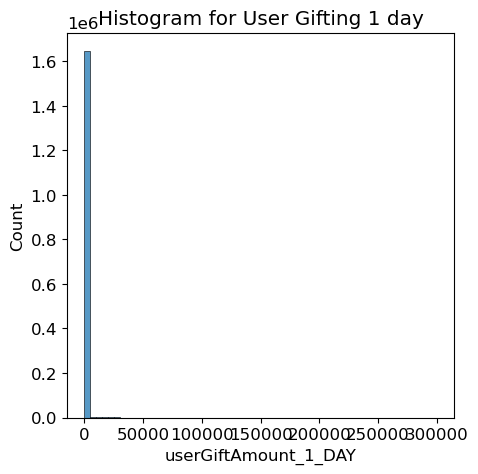

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.histplot(df["userGiftAmount_1_DAY"], binwidth=5000);
plt.title('Histogram for User Gifting 1 day')

Text(0.5, 1.0, 'Histogram for User AS request 1 day')

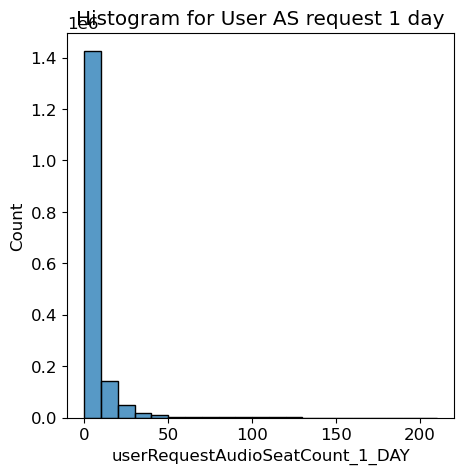

In [110]:
plt.figure(figsize=(5,5))
sns.histplot(df["userRequestAudioSeatCount_1_DAY"], binwidth=10);
plt.title('Histogram for User AS request 1 day')

Text(0.5, 1.0, 'Histogram for User Comments  1 day')

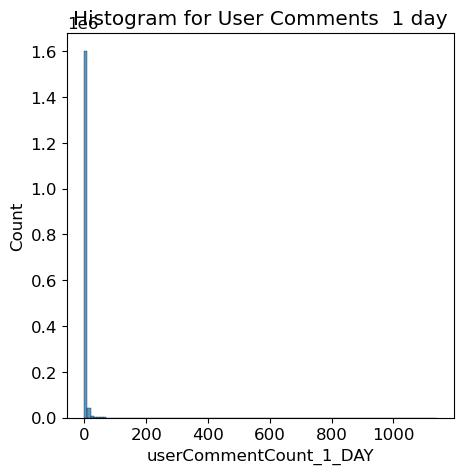

In [111]:
plt.figure(figsize=(5,5))
sns.histplot(df["userCommentCount_1_DAY"], binwidth=10);
plt.title('Histogram for User Comments  1 day')

Text(0.5, 1.0, 'Histogram for CR Users Joined  15 min')

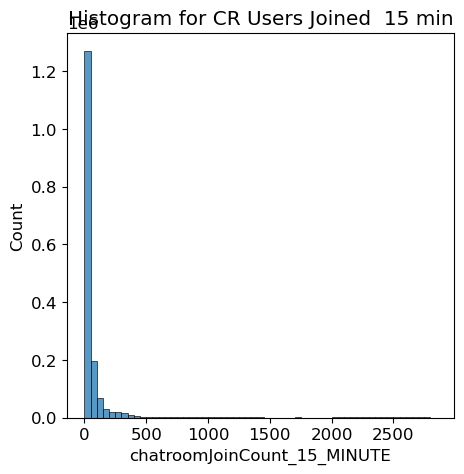

In [112]:

plt.figure(figsize=(5,5))
sns.histplot(df["chatroomJoinCount_15_MINUTE"], binwidth=50);
plt.title('Histogram for CR Users Joined  15 min')

Text(0.5, 1.0, 'Histogram for CR Gifting 15 min')

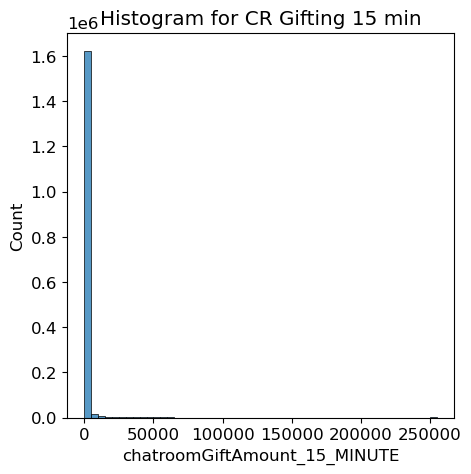

In [113]:

plt.figure(figsize=(5,5))
sns.histplot(df["chatroomGiftAmount_15_MINUTE"], binwidth=5000);
plt.title('Histogram for CR Gifting 15 min')

In [114]:
## Filtering step

df = df.loc[(df['userGiftAmount_1_DAY'] <= 10000) & (df['userRequestAudioSeatCount_1_DAY'] <= 70) & (df['userCommentCount_1_DAY'] <= 100) & (df['chatroomJoinCount_15_MINUTE'] <= 500) & (df['chatroomGiftAmount_15_MINUTE'] <= 10000)]


In [115]:
df[df.label==1].describe()

,label,userGiftAmount_1_DAY,userRequestAudioSeatCount_1_DAY,userCommentCount_1_DAY,chatroomJoinCount_15_MINUTE,chatroomGiftAmount_15_MINUTE
count,158735.0,158735.000000,158735.000000,158735.000000,158735.000000,158735.000000
mean,1.0,42.897515,7.357924,2.834617,18.754056,98.531212
std,0.0,384.065085,9.580439,3.841986,46.999509,597.972332
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,1.000000,1.000000,1.000000,0.000000
50%,1.0,0.000000,4.000000,2.000000,4.000000,0.000000
75%,1.0,0.000000,10.000000,4.000000,13.000000,0.000000
max,1.0,9987.000000,70.000000,100.000000,500.000000,9996.000000


In [116]:
df[df.label==0].describe()

,label,userGiftAmount_1_DAY,userRequestAudioSeatCount_1_DAY,userCommentCount_1_DAY,chatroomJoinCount_15_MINUTE,chatroomGiftAmount_15_MINUTE
count,1458658.0,1.458658e+06,1.458658e+06,1.458658e+06,1.458658e+06,1.458658e+06
mean,0.0,1.863839e+01,3.520473e+00,1.495260e+00,3.984015e+01,2.033602e+02
std,0.0,2.496825e+02,7.303582e+00,3.140693e+00,6.836652e+01,8.625713e+02
min,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
50%,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01,0.000000e+00
75%,0.0,0.000000e+00,4.000000e+00,2.000000e+00,4.600000e+01,1.800000e+01
max,0.0,9.987000e+03,7.000000e+01,1.000000e+02,5.000000e+02,1.000000e+04


In [117]:
from catboost import CatBoostClassifier, Pool, metrics, cv

In [118]:
X = df.drop('label', axis=1)
y = df['label']

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

In [120]:
best_model_params = {
    'iterations': 150,
    'eval_metric': metrics.AUC(),
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': True,
    'scale_pos_weight': df['label'].value_counts()[0] // df['label'].value_counts()[1]
}
train_pool = Pool(X_train, y_train)
validate_pool = Pool(X_test, y_test)

In [121]:
best_model = CatBoostClassifier(**best_model_params)
best_model.fit(train_pool, eval_set=validate_pool)

## Evaluation

In [122]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

model = best_model

In [123]:
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

test_set_accuracy = accuracy_score(y_test, y_pred_test)
train_set_accuracy = accuracy_score(y_train, y_pred_train)

print('Test Set Model accuracy score: {0:0.3f}'. format(test_set_accuracy))
print('Train Set Model accuracy score: {0:0.3f}'. format(train_set_accuracy))

Test Set Model accuracy score: 0.634
Train Set Model accuracy score: 0.636


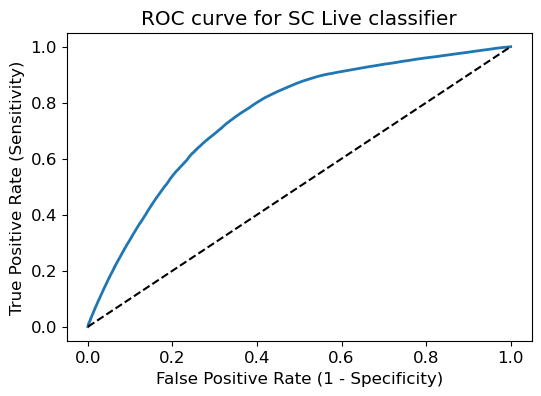

In [124]:
# plot ROC Curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

y_pred_test_prob = model.predict_proba(X_test)[:,1]
y_pred_train_prob = model.predict_proba(X_train)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for SC Live classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [125]:
from sklearn.metrics import roc_auc_score

ROC_AUC_TEST = roc_auc_score(y_test, y_pred_test_prob)
print('Test SET ROC AUC : {:.4f}'.format(ROC_AUC_TEST))

ROC_AUC_TRAIN = roc_auc_score(y_train, y_pred_train_prob)
print('Train Set ROC AUC : {:.4f}'.format(ROC_AUC_TRAIN))

Test SET ROC AUC : 0.7536
Train Set ROC AUC : 0.7573


In [126]:
from sklearn.metrics import average_precision_score

average_precision_test = average_precision_score(y_test, y_pred_test_prob)
print('Test Set PR-ROC AUC : {:.4f}'.format(average_precision_test))

average_precision_train = average_precision_score(y_train, y_pred_train_prob)
print('Train Set PR-ROC AUC : {:.4f}'.format(average_precision_train))

Test Set PR-ROC AUC : 0.2248
Train Set PR-ROC AUC : 0.2309


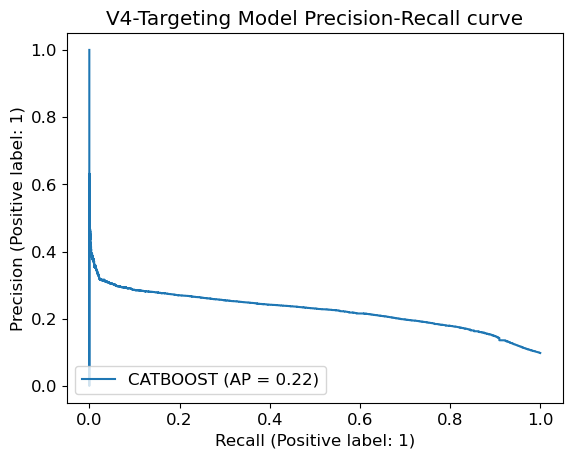

In [127]:
from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_test_prob, name="CATBOOST")
_ = display.ax_.set_title("V4-Targeting Model Precision-Recall curve")

In [128]:
precision_test = precision_score(y_test, y_pred_test)
recall_test    = recall_score(y_test, y_pred_test)
f1_test        = f1_score(y_test, y_pred_test)

print('Test Set : precision_score {:.4f}'.format(precision_test))
print('Test Set : recall_score {:.4f}'.format(recall_test))
print('Test Set : F1_Score {:.4f}'.format(f1_test))

precision_train = precision_score(y_train, y_pred_train)
recall_train    = recall_score(y_train, y_pred_train)
f1_train        = f1_score(y_train, y_pred_train)

print('Train Set : precision_score {:.4f}'.format(precision_train))
print('Train Set : recall_score {:.4f}'.format(recall_train))
print('Train Set : F1_Score {:.4f}'.format(f1_train))

Test Set : precision_score 0.1818
Test Set : recall_score 0.7827
Test Set : F1_Score 0.2951
Train Set : precision_score 0.1838
Train Set : recall_score 0.7874
Train Set : F1_Score 0.2981


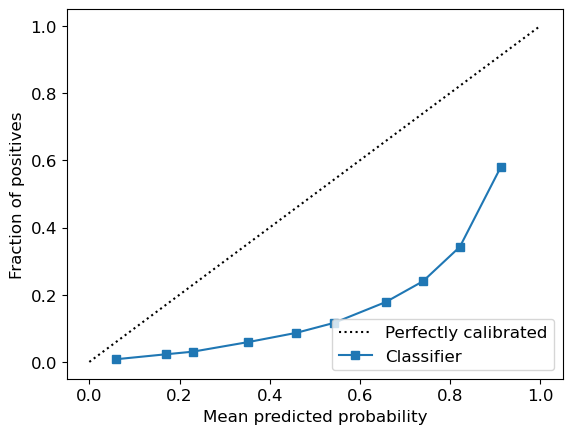

In [129]:
import matplotlib.pyplot as plt
from sklearn.calibration import CalibrationDisplay
disp = CalibrationDisplay.from_predictions(y_test, y_pred_test_prob, n_bins=10)
plt.show()

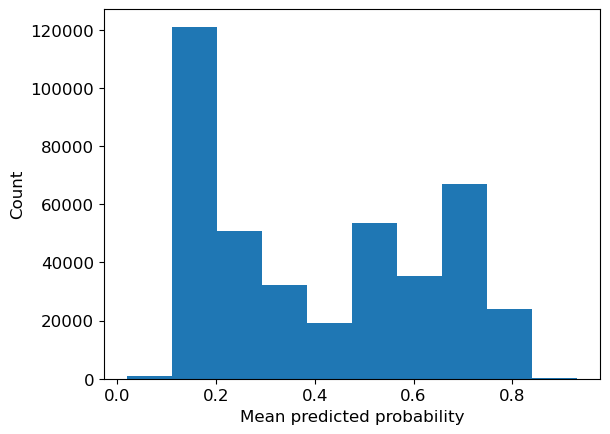

In [130]:
plt.hist(y_pred_test_prob)
plt.xlabel("Mean predicted probability")
plt.ylabel("Count")
plt.show() 

<AxesSubplot:ylabel='Feature'>

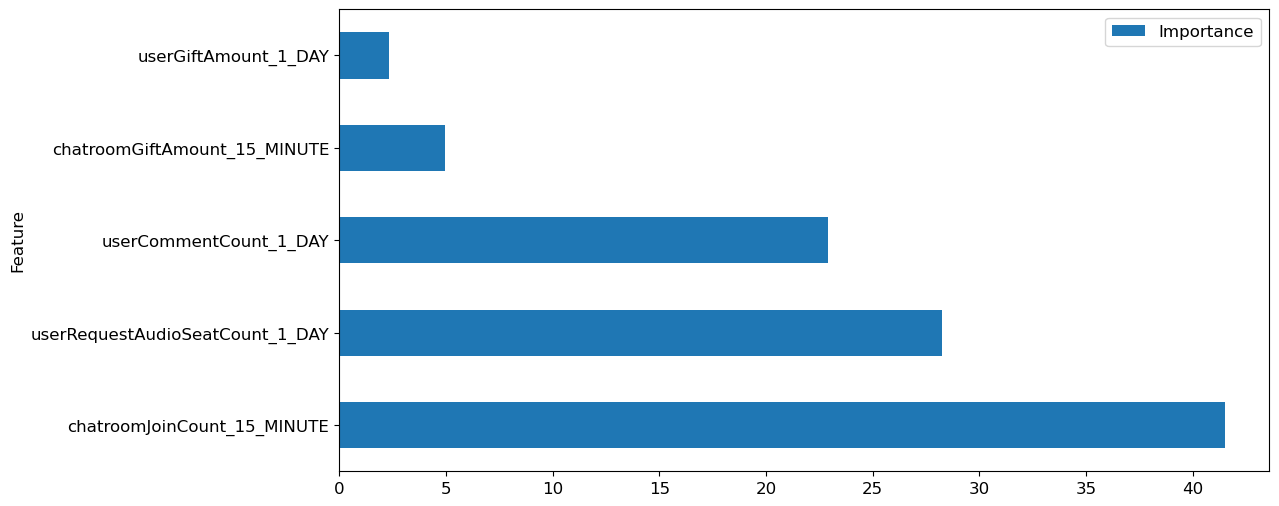

In [131]:
'''feature_importances = best_model.get_feature_importance(train_pool)
feature_names = X_train.columns
features_list = sorted(zip(feature_importances, feature_names), reverse=True)[:20]
for score, name in features_list:
    print('{}: {}'.format(name, score))

'''
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_model.get_feature_importance(train_pool)
})
importances = importances.sort_values(by='Importance', ascending=False)[0:20]
importances = importances.set_index('Feature')
importances.plot(kind='barh',figsize=(12,6))

In [132]:
best_model.save_model('real_time_v0.model')

In [133]:
test = {
            'userGiftAmount_1_DAY' : [10, 20],
            'userRequestAudioSeatCount_1_DAY' : [0, 1],
            'userCommentCount_1_DAY' : [10, 0],
            'chatroomJoinCount_15_MINUTE' : [5, 1],
            'chatroomGiftAmount_15_MINUTE' : [5, 0]
            }

df_test = pd.DataFrame(test, index = None)
df_test.head()


,userGiftAmount_1_DAY,userRequestAudioSeatCount_1_DAY,userCommentCount_1_DAY,chatroomJoinCount_15_MINUTE,chatroomGiftAmount_15_MINUTE
0,10,0,10,5,5
1,20,1,0,1,0


In [134]:
res = model.predict_proba(df_test)[:,1]

In [135]:
res

array([0.53482951, 0.68695401])

In [136]:
from_file = CatBoostClassifier()

In [137]:
from_file.load_model('real_time_v0.model')

In [138]:
res = from_file.predict_proba(df_test)[:,1]

In [139]:
res

array([0.53482951, 0.68695401])

In [140]:
0.7371325492858887, 0.6758689284324646

(0.7371325492858887, 0.6758689284324646)